# Notebook Dedicated to study the first candidates of bisMSB Data (above 5 MeV Cut)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import glob

# Load Data

In [2]:
# ------- Observable list -------
obs_list = ['energy', 'posr_av', 'posx', 'posy', 'posz']

# ------- Observable Dictionary -------
obs_dict = {obs: np.array([]) for obs in obs_list}

# ------- Directory of data -------
#data_type = ['analysis15', 'analysis15_bMR', 'analysis20_bMR']
main_dir = 'E:/Data/solars/solarnu_Realdata/bisMSB/first_candidates/analysis*/resume_files/'

# Loop over the observable list to load the data in obs_dict

for obs in obs_list:
    obs_dir_list = glob.glob(main_dir + obs + '.npy') # List of directories where the obs is

    # Now loop over the list of directories
    for fdir in obs_dir_list:
        obs_i = np.load(fdir)

        #Save the loaded numpy array in the corresponding key observable in the observable dictioary
        obs_dict[obs] = np.append(obs_dict[obs], obs_i)


energy = obs_dict['energy']
posr_av = obs_dict['posr_av']
posx = obs_dict['posx']
posy = obs_dict['posy']
posz = obs_dict['posz']

# Plots of Observables

## Energy

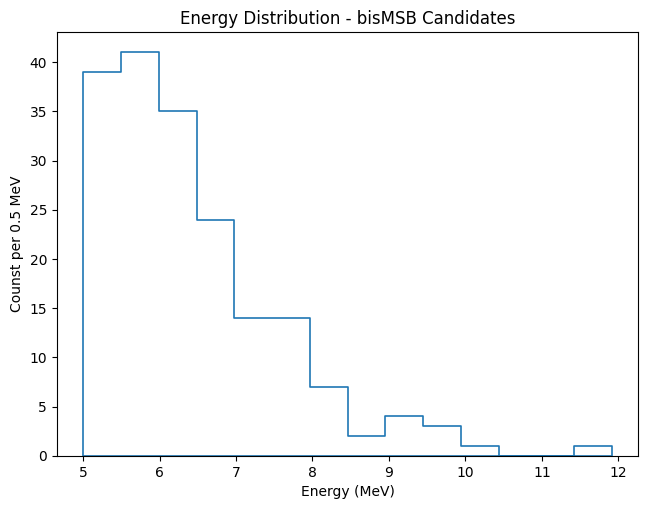

In [5]:
binwidth = 0.5

plt.figure(figsize = (7.5, 5.5))
sn.histplot(energy, binwidth = binwidth, element = 'step', alpha = 0, linewidth = 1.2)

plt.xlabel('Energy (MeV)')
plt.ylabel(f'Counst per {binwidth} MeV')

plt.title('Energy Distribution - bisMSB Candidates')

plt.show()

## pos_r

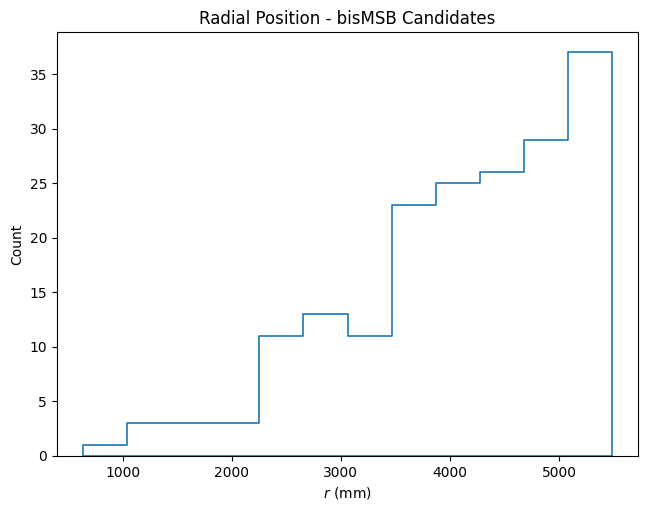

In [18]:
bins = 12

plt.figure(figsize = (7.5, 5.5))
sn.histplot(posr_av, bins = bins, element = 'step', alpha = 0, linewidth = 1.2)

plt.xlabel(r'$r$ (mm)')

plt.title('Radial Position - bisMSB Candidates')

plt.show()

## Norm. Pos_r

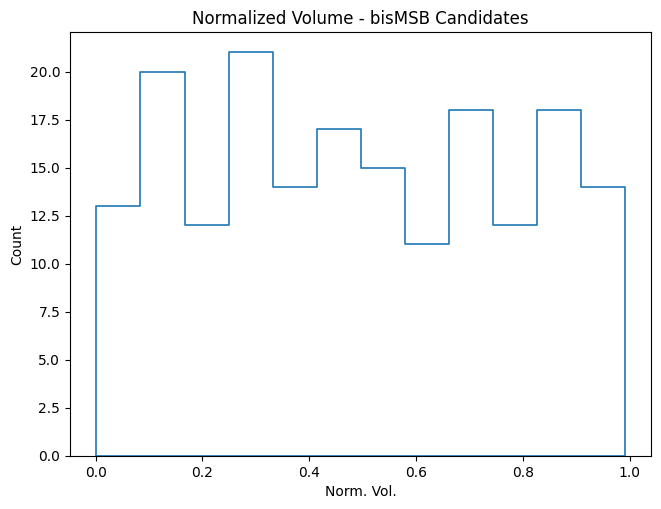

In [72]:
R_cut = 5500
norm_vol = (posr_av**3)/(R_cut**3)

bins = 12

plt.figure(figsize = (7.5, 5.5))
sn.histplot(norm_vol, bins = bins, element = 'step', alpha = 0, linewidth = 1.2)

plt.xlabel('Norm. Vol.')

plt.title('Normalized Volume - bisMSB Candidates')

plt.show()

## rho^2

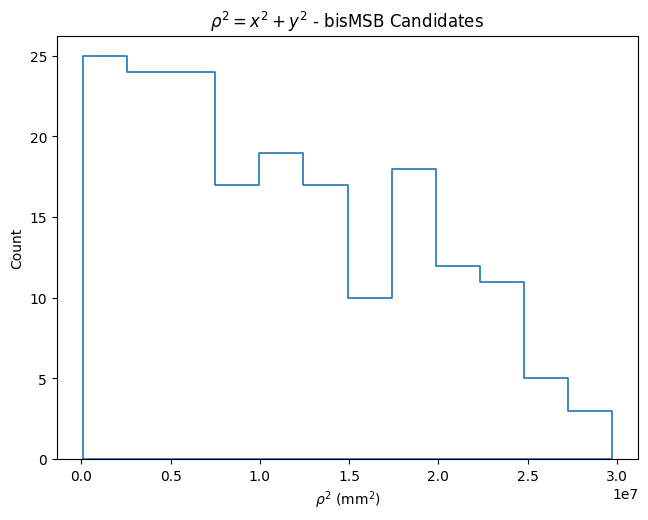

In [9]:
rho_sqr = (posx**2) + (posy**2)

bins = 12

plt.figure(figsize = (7.5, 5.5))
sn.histplot(rho_sqr, bins = bins, element = 'step', alpha = 0, linewidth = 1.2)

plt.xlabel(r'$\rho^2$ (mm$^2$)')

plt.title(r'$\rho^2 = x^2 + y^2$ - bisMSB Candidates')

plt.show()

## xy vs. rho^2

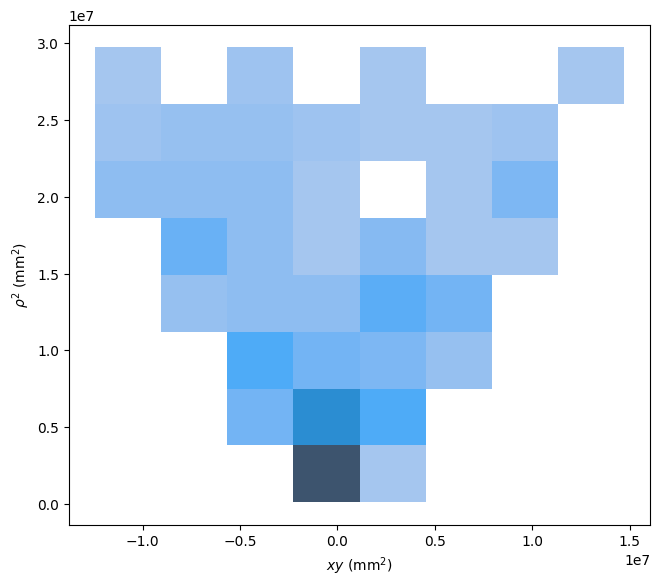

In [16]:
xy = posx * posy
rho_sqr = (posx**2) + (posy**2)

plt.figure(figsize = (7.5, 6.5))
sn.histplot(x = xy, y = rho_sqr, bins = (8,8))
plt.xlabel(r'$xy$ (mm$^2$)' )
plt.ylabel(r'$\rho^2$ (mm$^2$)')

plt.show()

## z vs. r^3 / R_cut^3

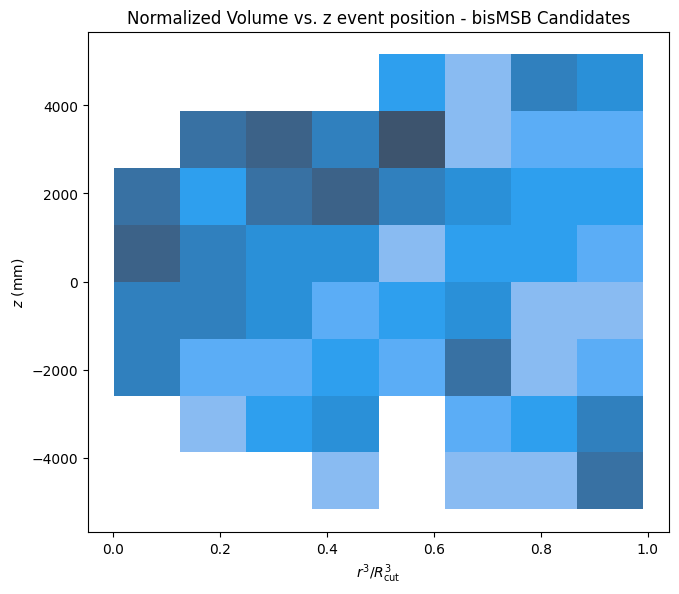

In [21]:
R_cut = 5500
norm_vol = (posr_av**3)/(R_cut**3)

plt.figure(figsize = (7.5, 6.5))
sn.histplot(x = norm_vol, y = posz, bins = (8,8))
plt.xlabel(r'$r^3 / R_{\text{cut}}^3$')
plt.ylabel(r'$z$ (mm)')

plt.title('Normalized Volume vs. z event position - bisMSB Candidates')

plt.show()

## z vs. rho^2

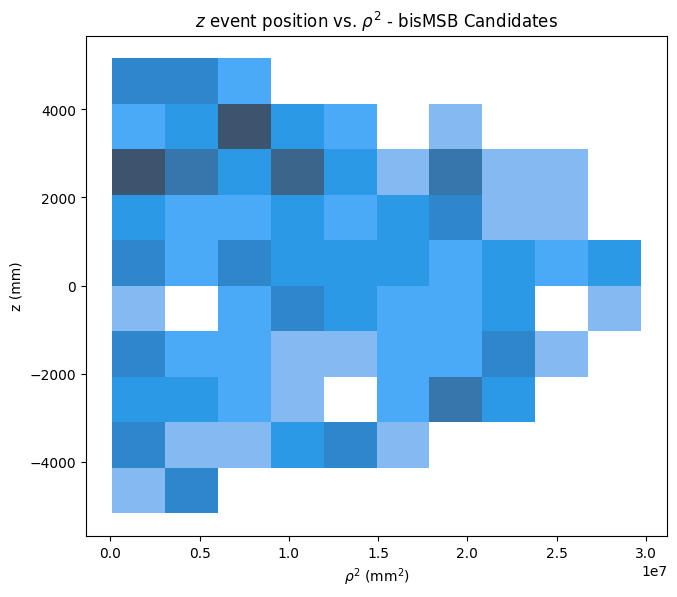

In [25]:
xy = posx * posy
rho_sqr = (posx**2) + (posy**2)

plt.figure(figsize = (7.5, 6.5))
sn.histplot(x = rho_sqr, y = posz, bins = (10,10))

plt.xlabel(r'$\rho^2$ (mm$^2$)')
plt.ylabel('z (mm)')

plt.title(r'$z$ event position vs. $\rho^2$ - bisMSB Candidates')

plt.show()